# Module 5 Section 1 Lab 1 - Decision Tree (Hyperparameter Tuning)
*Decision Tree* adalah algoritma *supervised learning* yang banyak digunakan untuk tugas klasifikasi dan regresi. *Decision Tree* juga dapat berfungsi sebagai bagian untuk beberapa algoritma *Ensemble Learning* seperti *Random Forests*, GBDT, and XGBOOST.

Sisi negatifnya, *Decision Tree* rentan terhadap *overfitting*. Mereka dapat dengan mudah menjadi terlalu kompleks yang mencegah menggeneralisasi dengan baik ke struktur dalam kumpulan data. Dalam hal ini, model kemungkinan akan berakhir dengan *overfitting* yang merupakan masalah serius dalam setiap pemodelan *machine learning*.

Untuk mengatasi masalah ini, kita perlu menyesuaikan hyperparameter *Decision Tree* dengan hati-hati. Dalam latihan ini, kita akan mempelajari visualisasi *Decision Tree* dengan *Hyperparameter Tuning*.

Untuk itu, kami akan menggunakan salah satu dataset yang telah disediakan oleh `scikit-learn`. Dataset wine berisi 13 fitur pada tiga kelas anggur yang berbeda. Terdapat 178 sampel dalam dataset.

https://archive.ics.uci.edu/ml/datasets/wine


## Objektif
Hyperparameter tuning pada Decision Tree

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine

import matplotlib.pyplot as plt
%matplotlib inline

X, y = load_wine(return_X_y=True)

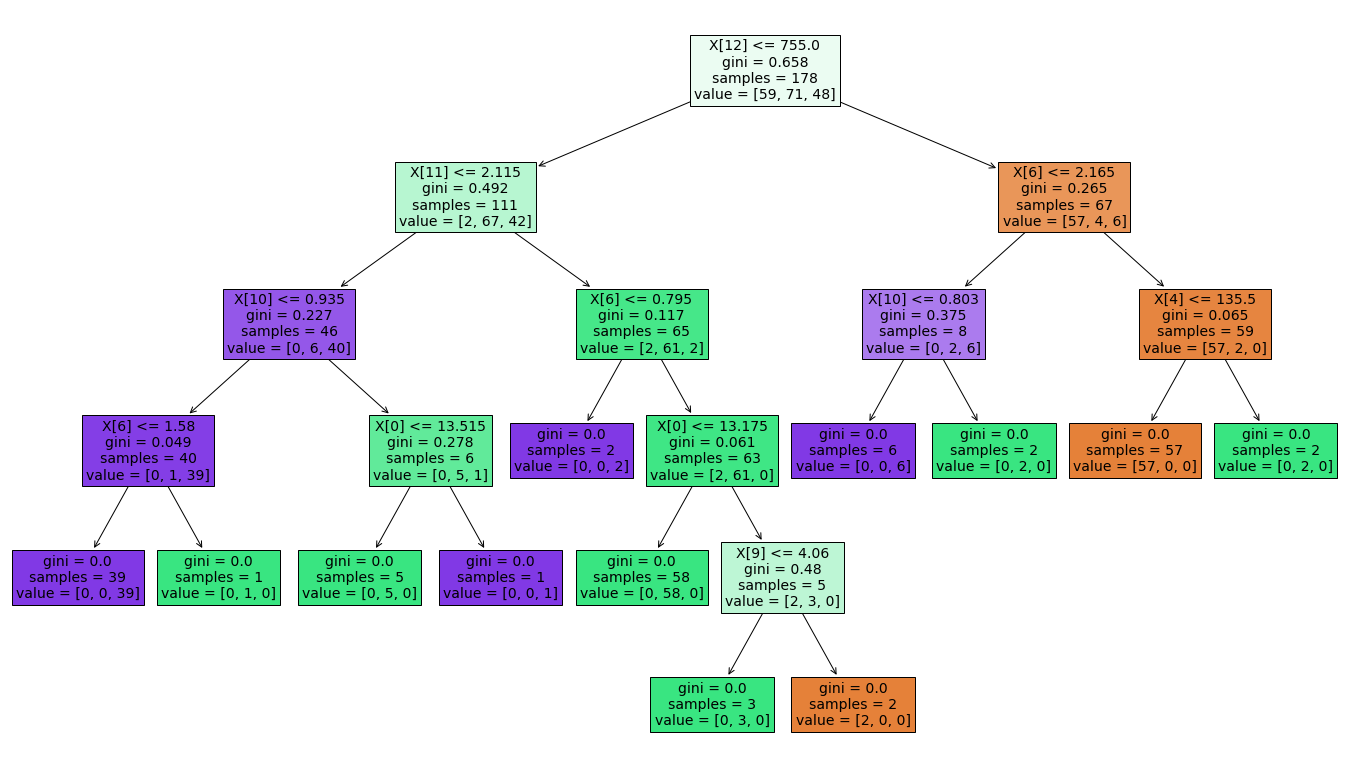

In [6]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X, y)

plt.figure(figsize=(24,14))
tree.plot_tree(clf, filled=True, fontsize=14)
plt.show()

Kita dapat mengamati bahwa model terus membelah sampai semua node berisi sampel hanya dari satu kelas.

*Gini impurity* adalah ukuran seberapa sering elemen yang dipilih secara acak dari himpunan data akan diberi label yang salah jika diberi label secara acak menurut distribusi label dalam himpunan bagian. Jika kita lihat *leaf-nodes* (simpul di ujung pohon), kita akan melihat bahwa nilai Gini sama dengan nol.

Fungsi lain untuk mengevaluasi kualitas split adalah *Entropy* yang merupakan ukuran ketidakpastian atau keacakan. Semakin banyak keacakan yang dimiliki suatu variabel, semakin tinggi entropinya. Kita tidak menginginkan pohon dengan semua *leaf-nodes* murni. Itu akan terlalu spesifik dan cenderung *overfitting*.

Ketika algoritma melakukan pemisahan, tujuan utamanya adalah untuk mengurangi *Impurity* sebanyak mungkin. Semakin banyak ketidakmurnian berkurang, semakin banyak kekuatan informatif yang membagi keuntungan. Saat pohon semakin dalam, jumlah *Impurity* berkurang menjadi lebih rendah. Kita dapat menggunakan ini untuk mencegah pohon melakukan pemisahan lebih lanjut.

Hyperparameter untuk tugas ini adalah `min_impurity_decrease`. Ini diatur ke nol secara default. Mari kita ubah dan lihat perbedaannya.

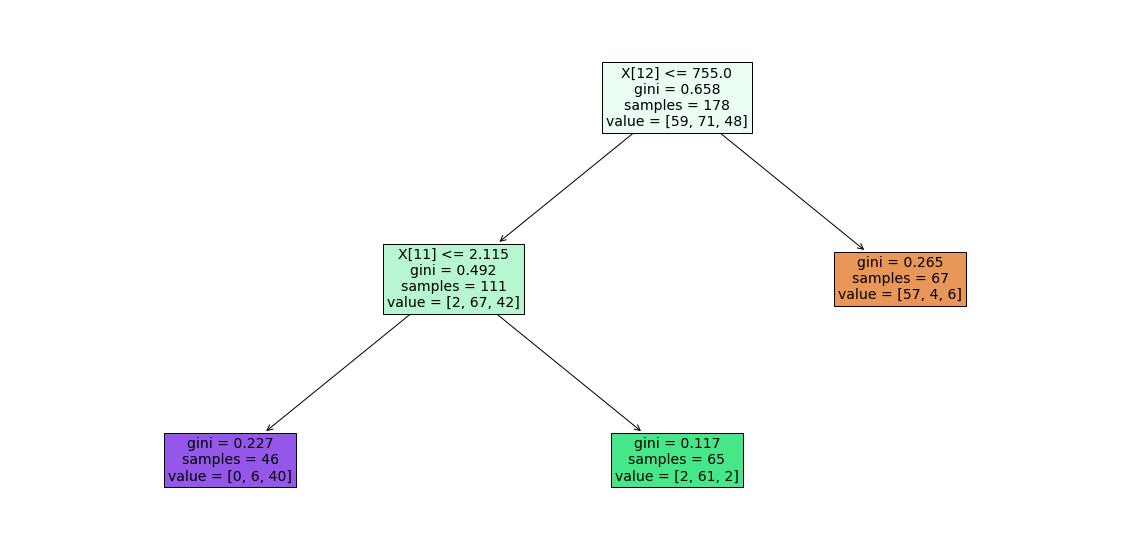

In [9]:
clf = tree.DecisionTreeClassifier(min_impurity_decrease=0.2)
clf.fit(X, y)

plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, fontsize=14)
plt.show()

Kita sekarang memiliki pohon yang jauh lebih kecil. Pertimbangkan simpul hijau di bagian bawah. Ini berisi 65 sampel dan 61 di antaranya milik satu kelas. Maka, kita tidak perlu lagi membagi node tersebut karena kita dapat memiliki 4 sampel yang salah klasifikasi dari 65. Jika kita terus membelah node tersebut, model mungkin akan *overfitting*.

Parameter `min_impurity_split` dapat digunakan untuk mengontrol pohon berdasarkan nilai *Impurity*. Ini menetapkan ambang batas pada *Gini*. Misalnya, jika `min_impurity_split` diatur ke `0.3`, sebuah simpul harus memiliki nilai gini yang lebih dari 0,3 untuk dipecah lebih lanjut.

Hyperparameter lain untuk mengontrol kedalaman pohon adalah `max_depth`. Ini tidak membuat perhitungan apa pun tentang *Impurity* atau *Sample*. Model berhenti membelah ketika `max_depth` tercapai.

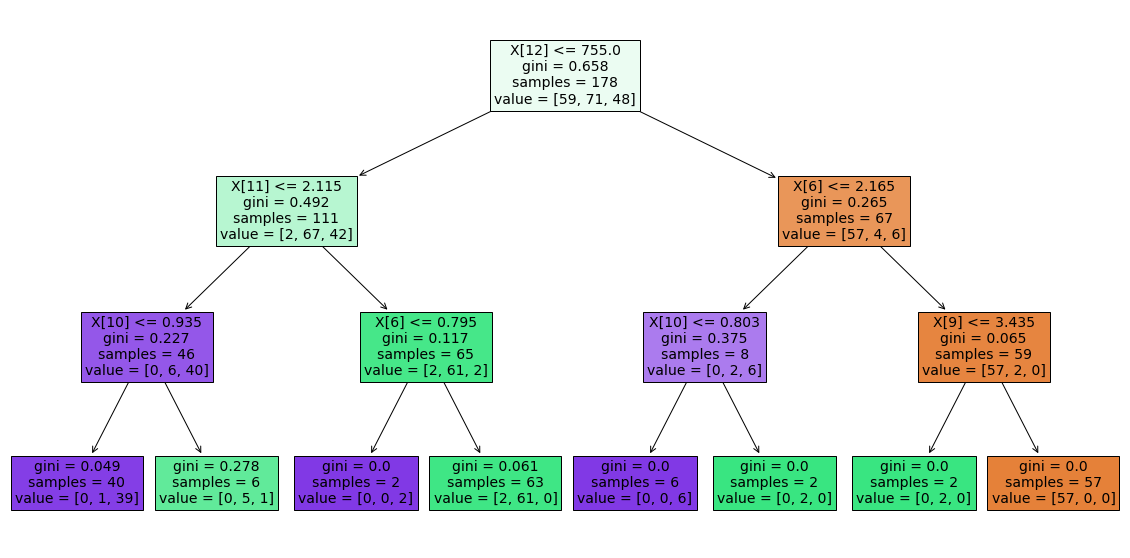

In [8]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)

plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, fontsize=14)
plt.show()

Parameter `max_depth` kurang fleksibel dibandingkan dengan `min_impurity_decrease`. Ini sebenarnya membawa kita ke hyperparameter lain yaitu `min_samples_leaf` yang menunjukkan jumlah minimum sampel yang diperlukan untuk berada di *leaf-node*. 

Kita harus berhati-hati saat menggunakan hyperparameters bersama-sama.

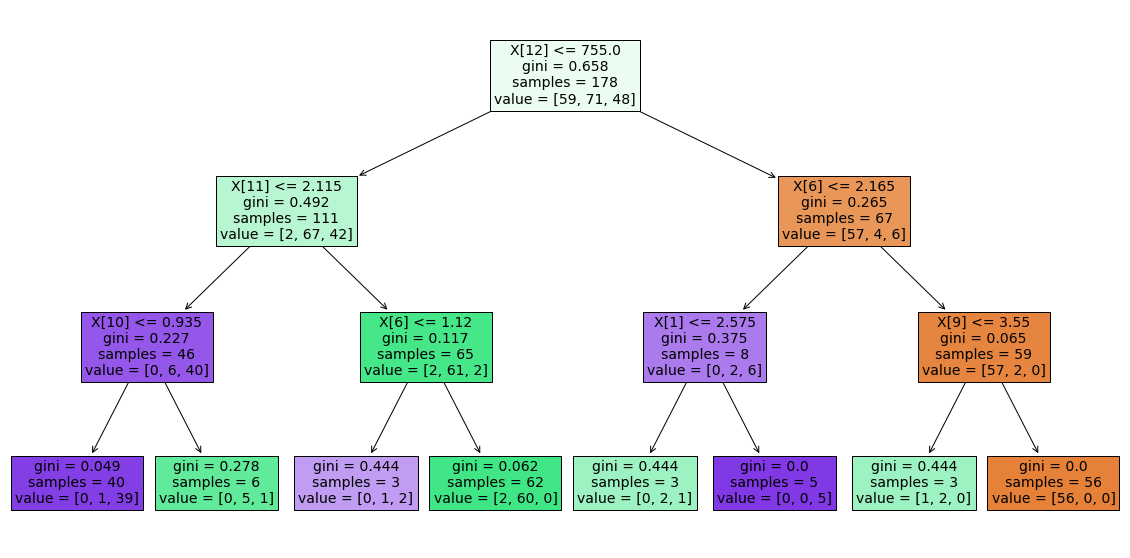

In [10]:
clf = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=3)
clf.fit(X, y)

plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, fontsize=14)
plt.show()

Dalam hal ini, `min_samples_leaf` sebenarnya berbahaya bagi model. Itu tidak mencegah model melakukan split terakhir.

Kita juga dapat membatasi jumlah *leaf-node* menggunakan parameter `max_leaf_nodes` yang menumbuhkan pohon dengan cara terbaik-pertama hingga `max_leaf_nodes` tercapai. Pemisahan terbaik diputuskan berdasarkan penurunan *Impurity*.

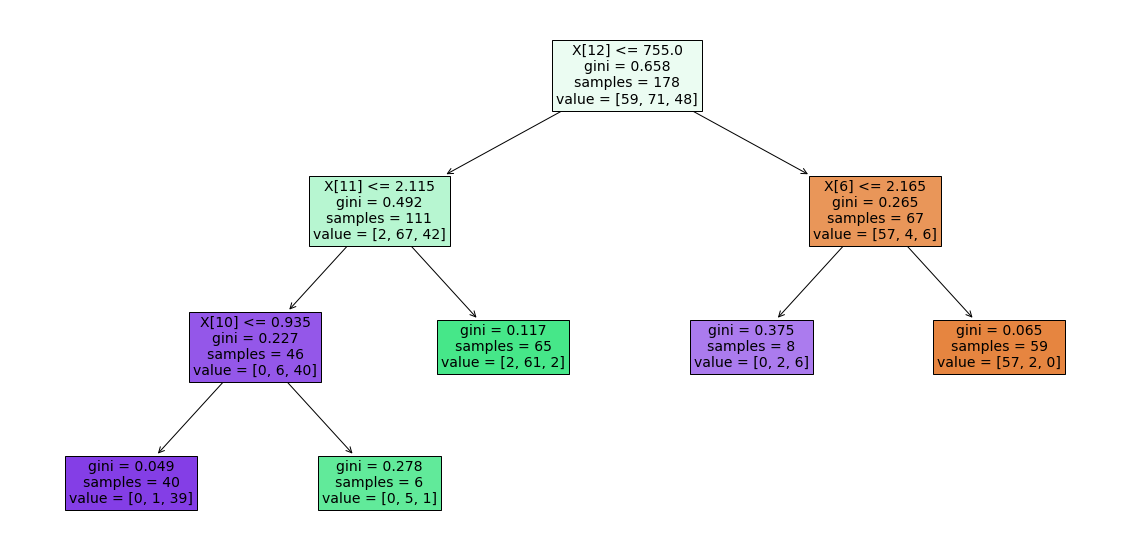

In [11]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes=5)
clf.fit(X, y)

plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, fontsize=14)
plt.show()

Pada akhirnya, kita memiliki pohon dengan 5 *leaf-node*.

Hyperparameter penting lainnya dari pohon keputusan adalah `max_features` yang merupakan jumlah fitur yang perlu dipertimbangkan ketika mencari pemisahan terbaik.

Jika tidak ditentukan, model mempertimbangkan semua fitur. Ada 13 fitur dalam dataset. Jika kita menetapkan parameter `max_features` bernilai `5`, maka model secara acak memilih 5 fitur untuk memutuskan pembagian berikutnya. Parameter `max_features` juga membantu mencegah model dari *overfitting*, tetapi tidak cukup hanya menggunakan `max_features`.|